## **Dados linearmente separáveis**

In [43]:
## IMPORTAR BIBLIOTECAS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

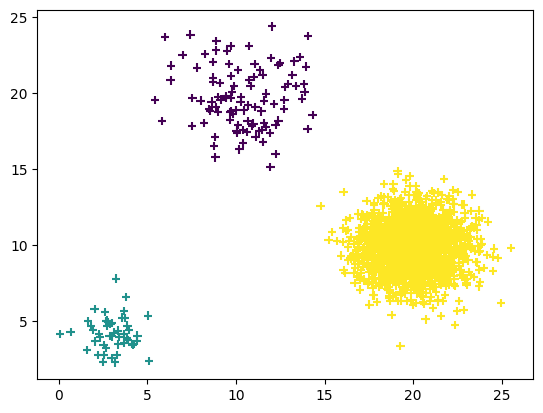

[[-0.03268071  1.55038941  5.26559289  3.23399263  3.47289212]
 [-2.83044392  0.7377152   0.76634789  3.40650529 -0.12633688]] 

[[0. 0. 0. 0. 0.]]
[[ 7.57853435  3.37177703 -0.31327952 10.59736467  2.87467598]
 [ 2.80037882  6.6396811   3.82074522  2.76165363  3.80635131]] 

[[1. 1. 1. 1. 1.]]


In [44]:
## EXEMPLO MOSTRADO EM AULA

n_samples=[100,50,2000]
centers=[[10,20],[3,4],[20,10]]
n_features=2
cluster_std=[2,1,1.5]

X, Y = make_blobs(n_samples=[100,50,2000], centers=[[10,20],[3,4],[20,10]], n_features=2,cluster_std=[2,1,1.5])

plt.figure()
plt.scatter(X[:,0],X[:,1],marker = '+', c = Y)
plt.show()

# Classe 1
i = 0
X1 =  np.random.randn(1,5) * 2 + 3
X2 =  np.random.randn(1,5) * 3 + 2
X = np.concatenate((X1,X2), axis = 0)
print(X,'\n')
yd = np.ones([1,5]) * i # i serve para definir o número de classes
print(yd)

# Classe 2
i = 1
X1 =  np.random.randn(1,5) * 4 + 2
X2 =  np.random.randn(1,5) * 2 + 4
X = np.concatenate((X1,X2), axis = 0)
print(X,'\n')
yd = np.ones([1,5]) * i # i serve para definir o número de classes
print(yd)

In [45]:
X1

array([[ 7.57853435,  3.37177703, -0.31327952, 10.59736467,  2.87467598]])

In [66]:
## DECLARAÇÃO DA FUNÇÃO

# Cria o perceptron
def yperceptron(W,b,X):
  # Calcula a função aditiva, multiplicando a matriz de peso (W) pela matriz de entradas
  u = np.dot(W,X) + b
  # Loop for para percorrer a matriz e aplicar a função de ativação, neste caso sendo a função degrau/limiar
  for i in range(u.shape[1]):
      if u[0, i] >= 0:
          u[0, i] = 1
      else:
          u[0, i] = 0
  return u

# Função de treinamento do Perceptron
def treina_perceptron(W,b,X,yd,alfa,maxepocas,tol):
  epoca = 1
  N = X.shape[1] # Número de amostras na matriz de dados
  print(f'N = {N}')
  SEQ = tol # Declaração necessária para ultrapassar primeira validação do loop while abaixo
  vetor_seq = []
  while (epoca <= maxepocas and SEQ >= tol):
    SEQ = 0
    for i in range(0,N):
      y = yperceptron(W,b,X[:,i])
      erro = yd[i] - y
      # Regra delta/Gradiente descendente
      W = W + alfa * erro * X[:,i].T # Calcular novos pesos W
      b = b + alfa * erro # Calcular novo bias
      SEQ = SEQ + erro**2 # Somatório dos erros quadráticos
    print(f'SEQ = {SEQ[0]} na Epoca {epoca}')
    epoca = epoca + 1
    vetor_seq.append(SEQ[0])
  W = W.reshape(1, 2)
  return [W,b,vetor_seq]

def geragauss(nc,npc,mc,varc):
  X, yd = make_blobs(n_samples=npc, centers=mc, n_features=nc,cluster_std=np.sqrt(varc))

  return X, yd

def mistura(X,yd):
  df = np.concatenate((X,yd[:, None]),axis=1)
  np.random.shuffle(df)
  X = df[:, :-1]  # Extraindo todas as colunas menos a ulitma
  yd = df[:, -1]  # Extraindo a última coluna como variável alvo
  X = X.T
  return X, yd

def plotadc2d(X,y):
  plt.scatter(X[0,:],X[1,:],c=yd)

def plotareta(W,b,intervalo):
  x1 = np.linspace(intervalo[0],intervalo[1],num=10)
  x2 = -(W[0,0]*x1+b)/W[0,1]
  plt.plot(x1.T,x2.T,'b-')

In [47]:
## DECLARAÇÃO DAS VARIÁVEIS
# A variável X é a matriz com as entradas do Perceptron

npc=[100,500]
mc=[[10,20],[3,4]]
nc=2
varc=[3,1.5]

alfa = 0.001 # O valor de alfa dita o passo de ajuste dos pesos
maxepocas = 10
tol = 0.001 # tol é a tolerancia máxima estabelecida para o erro no treinamento

W = np.array([np.random.rand(1,2)])*2-1 # Criar variável W com os pesos randômicos entre -1 e 1 (*2-1 é a operação para mover o range do rand de 0 a 1 para -1 a 1)

# A variável b é o bias, que tem o objetivo variar a influência das entradas
b = 1

# Intervalo para plotar a reta de fronteira de decisão
intervalo = [0,20]

Número de variáveis de X =  2
Número de amostras de X =  600 



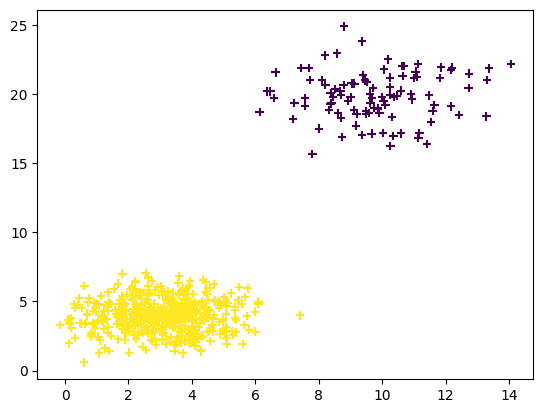

In [48]:
X,yd = geragauss(nc,npc,mc,varc)
X,yd = mistura(X,yd)

print('Número de variáveis de X = ',X.shape[0])
print('Número de amostras de X = ',X.shape[1],'\n')

plt.figure()
plt.scatter(X[0,:],X[1,:],marker = '+', c = yd)
plt.show()

In [49]:
X.shape

(2, 600)

In [50]:
yd.shape

(600,)

In [64]:
W.shape

(1, 2)

In [65]:
b.shape

(1, 1)

In [67]:
# Chama a função de treinamento do percepton
W,b,vetor_seq = treina_perceptron(W,b,X,yd,alfa,maxepocas,tol)

N = 600
SEQ = [86.] na Epoca 1
SEQ = [88.] na Epoca 2
SEQ = [84.] na Epoca 3
SEQ = [88.] na Epoca 4
SEQ = [86.] na Epoca 5
SEQ = [88.] na Epoca 6
SEQ = [94.] na Epoca 7
SEQ = [88.] na Epoca 8
SEQ = [84.] na Epoca 9
SEQ = [86.] na Epoca 10
SEQ = [88.] na Epoca 11
SEQ = [84.] na Epoca 12
SEQ = [94.] na Epoca 13
SEQ = [88.] na Epoca 14
SEQ = [88.] na Epoca 15
SEQ = [86.] na Epoca 16
SEQ = [88.] na Epoca 17
SEQ = [86.] na Epoca 18
SEQ = [88.] na Epoca 19
SEQ = [84.] na Epoca 20
SEQ = [88.] na Epoca 21
SEQ = [86.] na Epoca 22
SEQ = [88.] na Epoca 23
SEQ = [94.] na Epoca 24
SEQ = [82.] na Epoca 25
SEQ = [94.] na Epoca 26
SEQ = [88.] na Epoca 27
SEQ = [84.] na Epoca 28
SEQ = [86.] na Epoca 29
SEQ = [88.] na Epoca 30
SEQ = [92.] na Epoca 31
SEQ = [86.] na Epoca 32
SEQ = [88.] na Epoca 33
SEQ = [86.] na Epoca 34
SEQ = [88.] na Epoca 35
SEQ = [84.] na Epoca 36
SEQ = [88.] na Epoca 37
SEQ = [86.] na Epoca 38
SEQ = [88.] na Epoca 39
SEQ = [94.] na Epoca 40
SEQ = [82.] na Epoca 41
SEQ = [94.] na Ep

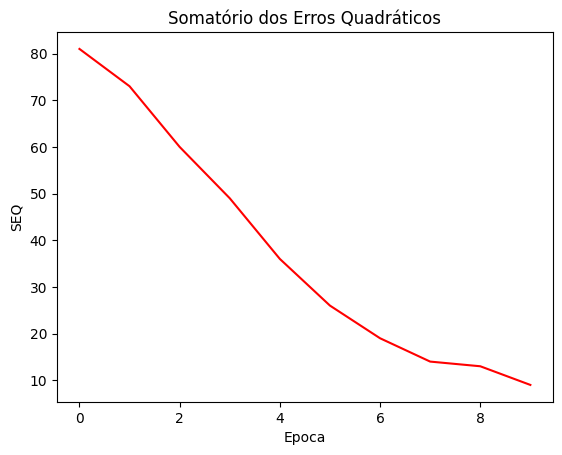

In [52]:
## Plota SEQ
plt.plot(vetor_seq,'r-')
plt.xlabel('Epoca')
plt.ylabel('SEQ')
plt.title('Somatório dos Erros Quadráticos')
plt.show()

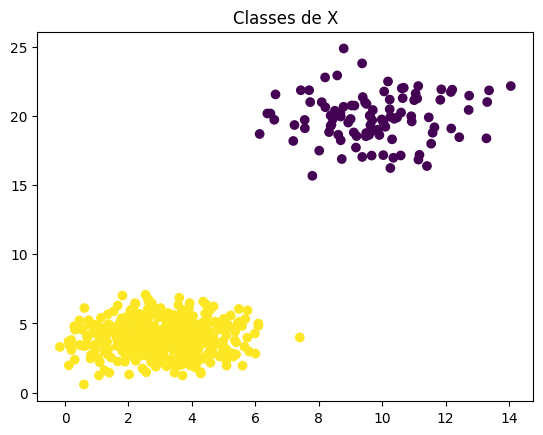

In [53]:
# Cálculo da saída do Perceptron
y = yperceptron(W,b,X)
plt.title('Classes de X')
plotadc2d(X,y)

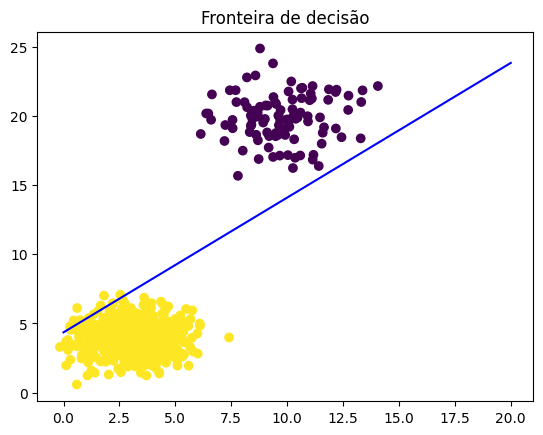

In [54]:
plotadc2d(X,y)
plotareta(W,b,intervalo)
plt.title('Fronteira de decisão')
plt.show()

### **Dados não linearmente separáveis**

In [55]:
## DECLARAÇÃO DA FUNÇÃO

# Cria o perceptron
def yperceptron(W,b,X):
  # Calcula a função aditiva, multiplicando a matriz de peso (W) pela matriz de entradas
  u = np.dot(W,X) + b
  # Loop for para percorrer a matriz e aplicar a função de ativação, neste caso sendo a função degrau/limiar
  for i in range(u.shape[1]):
      if u[0, i] >= 0:
          u[0, i] = 1
      else:
          u[0, i] = 0
  return u

# Função de treinamento do Perceptron
def treina_perceptron(W,b,X,yd,alfa,maxepocas,tol):
  epoca = 1
  N = X.shape[1] # Número de amostras na matriz de dados
  print(f'N = {N}')
  SEQ = tol # Declaração necessária para ultrapassar primeira validação do loop while abaixo
  vetor_seq = []
  while (epoca <= maxepocas and SEQ >= tol):
    SEQ = 0
    for i in range(0,N):
      y = yperceptron(W,b,X[:,i])
      erro = yd[i] - y
      # Regra delta/Gradiente descendente
      W = W + alfa * erro * X[:,i].T # Calcular novos pesos W
      b = b + alfa * erro # Calcular novo bias
      SEQ = SEQ + erro**2 # Somatório dos erros quadráticos
    print(f'SEQ = {SEQ[0]} na Epoca {epoca}')
    epoca = epoca + 1
    vetor_seq.append(SEQ[0])
  W = W.reshape(1, 2)
  return [W,b,vetor_seq]

def geragauss(nc,npc,mc,varc):
  X, yd = make_blobs(n_samples=npc, centers=mc, n_features=nc,cluster_std=np.sqrt(varc))

  return X, yd

def mistura(X,yd):
  df = np.concatenate((X,yd[:, None]),axis=1)
  np.random.shuffle(df)
  X = df[:, :-1]  # Extraindo todas as colunas menos a ulitma
  yd = df[:, -1]  # Extraindo a última coluna como variável alvo
  X = X.T
  return X, yd

def plotadc2d(X,yd):
  plt.scatter(X[0,:],X[1,:],c=yd)

def plotareta(W,b,intervalo):
  x1 = np.linspace(intervalo[0],intervalo[1],num=10)
  x2 = -(W[0,0]*x1+b)/W[0,1]
  plt.plot(x1.T,x2.T,'b-')

In [56]:
## DECLARAÇÃO DAS VARIÁVEIS
# A variável X é a matriz com as entradas do Perceptron

npc=[100,500]
mc=[[10,20],[12,18]]
nc=2
varc=[3,1.5]

alfa = 0.001 # O valor de alfa dita o passo de ajuste dos pesos
maxepocas = 100
tol = 0.001 # tol é a tolerancia máxima estabelecida para o erro no treinamento

W = np.array([np.random.rand(1,2)])*2-1 # Criar variável W com os pesos randômicos entre -1 e 1 (*2-1 é a operação para mover o range do rand de 0 a 1 para -1 a 1)

# A variável b é o bias, que tem o objetivo variar a influência das entradas
b = 1

# Intervalo para plotar a reta de fronteira de decisão
intervalo = [0,20]

Número de variáveis de X =  2
Número de amostras de X =  600 



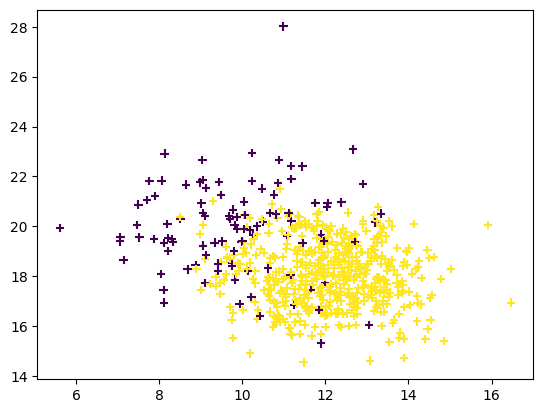

In [57]:
X,yd = geragauss(nc,npc,mc,varc)
X,yd = mistura(X,yd)

print('Número de variáveis de X = ',X.shape[0])
print('Número de amostras de X = ',X.shape[1],'\n')

plt.figure()
plt.scatter(X[0,:],X[1,:],marker = '+', c = yd)
plt.show()

In [58]:
# Chama a função de treinamento do percepton
W,b,vetor_seq = treina_perceptron(W,b,X,yd,alfa,maxepocas,tol)

N = 600
SEQ = [210.] na Epoca 1
SEQ = [167.] na Epoca 2
SEQ = [106.] na Epoca 3
SEQ = [89.] na Epoca 4
SEQ = [87.] na Epoca 5
SEQ = [92.] na Epoca 6
SEQ = [90.] na Epoca 7
SEQ = [88.] na Epoca 8
SEQ = [90.] na Epoca 9
SEQ = [86.] na Epoca 10
SEQ = [88.] na Epoca 11
SEQ = [86.] na Epoca 12
SEQ = [94.] na Epoca 13
SEQ = [88.] na Epoca 14
SEQ = [82.] na Epoca 15
SEQ = [86.] na Epoca 16
SEQ = [88.] na Epoca 17
SEQ = [94.] na Epoca 18
SEQ = [82.] na Epoca 19
SEQ = [94.] na Epoca 20
SEQ = [88.] na Epoca 21
SEQ = [84.] na Epoca 22
SEQ = [86.] na Epoca 23
SEQ = [88.] na Epoca 24
SEQ = [84.] na Epoca 25
SEQ = [92.] na Epoca 26
SEQ = [87.] na Epoca 27
SEQ = [89.] na Epoca 28
SEQ = [98.] na Epoca 29
SEQ = [91.] na Epoca 30
SEQ = [84.] na Epoca 31
SEQ = [92.] na Epoca 32
SEQ = [84.] na Epoca 33
SEQ = [84.] na Epoca 34
SEQ = [88.] na Epoca 35
SEQ = [87.] na Epoca 36
SEQ = [84.] na Epoca 37
SEQ = [86.] na Epoca 38
SEQ = [94.] na Epoca 39
SEQ = [88.] na Epoca 40
SEQ = [88.] na Epoca 41
SEQ = [86.] na

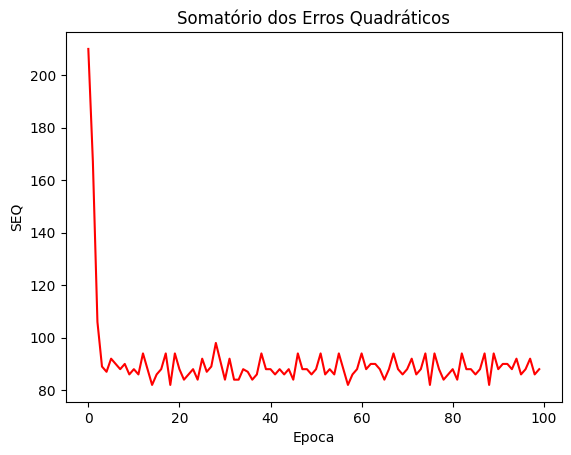

In [59]:
## Plota SEQ
plt.plot(vetor_seq,'r-')
plt.xlabel('Epoca')
plt.ylabel('SEQ')
plt.title('Somatório dos Erros Quadráticos')
plt.show()

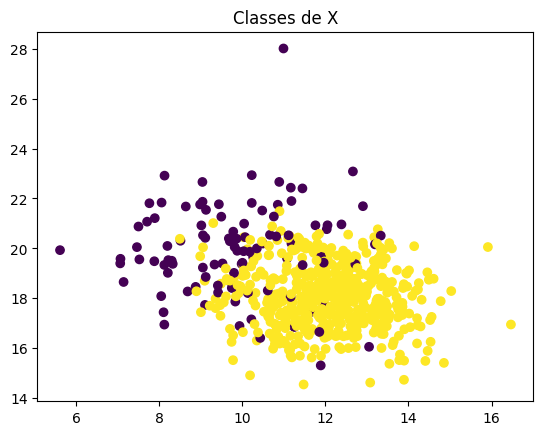

In [60]:
# Cálculo da saída do Perceptron
y = yperceptron(W,b,X)
plt.title('Classes de X')
plotadc2d(X,yd)

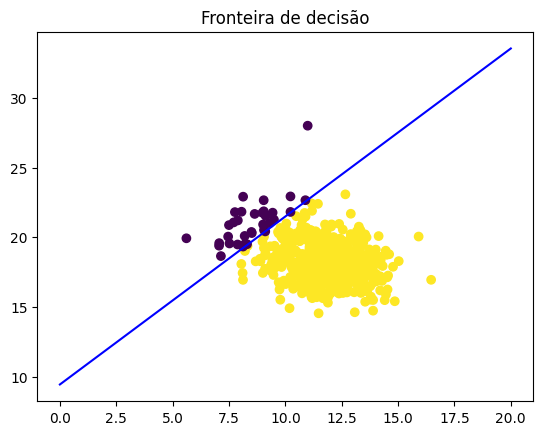

In [61]:
plotadc2d(X,y)
plotareta(W,b,intervalo)
plt.title('Fronteira de decisão')
plt.show()